# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing/Reading Covid_Worldwild.csv

In [2]:
DS1 = pd.read_csv("C:\\Users\\HP\\Desktop\\Projects\\Project 1\\covid_worldwide.csv")
DS1

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [3]:
# Checking the Number of columns and their datatype
DS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


# Checking the Null Values

In [4]:
# Checking the null values in the columns 
DS1.isnull().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        6
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [5]:
# DS2 shows the rows having null values in any column
DS2 = DS1[DS1.isnull().any(axis=1)]
DS2

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
10,11,Turkey,"17,042,722","101,492",NaN,NaN,"162,743,369","85,561,976"
29,30,DPRK,"4,772,813",74,"4,772,739",0,NaN,"25,990,679"
65,66,Tunisia,"1,150,356","29,308",NaN,NaN,"4,997,373","12,046,656"
77,78,Paraguay,"806,256","19,820",NaN,NaN,"2,657,506","7,305,843"
90,91,China,"503,302","5,272","379,053","118,977","160,000,000",NaN
94,95,Honduras,"470,757","11,104",NaN,NaN,"1,619,676","10,221,247"
111,112,Martinique,"229,687","1,097",NaN,NaN,"828,928","374,087"
112,113,Laos,"217,973",758,NaN,NaN,"1,233,207","7,481,023"
113,114,Iceland,"208,688",229,NaN,NaN,"1,996,384","345,393"
117,118,Guadeloupe,"201,394","1,007",NaN,NaN,"938,039","399,794"


In [6]:
# We can study some relation between between Total Cases , Total Deaths , Total Recovered and Active Cases

## We can fill = 0 to null values onl if =
# Possibilty 1 = Total Cases - Case1.1 ( Total Deaths + Total Recovered + Active Cases)
#                            - Case1.2 (= Total Deaths)
#                            - Case1.3 (= Total Recovered)
#                            - Case1.4 (= Active Cases)
#                            - Case1.5 (= Total Deaths + Active Cases)
#                            - Case1.6 (= Total Recovered + Active Cases)

# Possibilty 2 - If we Subtract then Active Cases from Total Cases.....
#                (Total Cases - Active Cases = X ) ....then this X must be equal to = 
#                            - Case2.1 (X = Total Deaths + Total Recovered)
#                            - Case2.2 (X = Total Deaths(Total Recovered=0))
#                            - Case2.3 (X = Total Recovered(Total Deaths=0))

# With the help of these Possibilites/Relation between the Columns we can Fill the Values 

## But we can't fill any values where = 
#                            - Case 3.1 ( Value of Active Cases and Total Deaths is null & Total Cases != Total Recovered)
#                            - Case 3.2 ( Value of Active Cases and Total Recovered is null & Total Cases != Total Deaths)
#                            - Case 3.3 ( Null values present in Total test column)
#                            - Case 3.4 ( Null values present in Population column)

# Filling up the null values that satisfies the above equations/cases - 

In [7]:
# All the rows of having null values in the Column ("Total Deaths")satisfies the Possibility 1 and 2 # 
# Therefore all the Null values is filled up by 0 without having no effect on data 

DS1["Total Deaths"]=DS1["Total Deaths"].fillna(0)  
DS1.isnull().sum()

Serial Number       0
Country             0
Total Cases         0
Total Deaths        0
Total Recovered    21
Active Cases       19
Total Test         18
Population          3
dtype: int64

In [8]:
# Remaining Null Values will be changed/removed according to the arguments 

In [9]:
DS1

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,0,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


# Changing the Possible Dataype

In [10]:
# Changing the Datatype of Total Cases to Int

DS1["Total Cases"]=DS1["Total Cases"].str.replace(",","")
DS1["Total Cases"]=DS1["Total Cases"].astype(int)

In [11]:
# Changing the Datatype of Total Deaths into Int  

DS1["Total Deaths"]=DS1["Total Deaths"].str.replace(",","")
DS1["Total Deaths"]=DS1["Total Deaths"].fillna(0)
DS1["Total Deaths"]=DS1["Total Deaths"].astype(int)

In [12]:
DS1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    int32 
 3   Total Deaths     231 non-null    int32 
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int32(2), int64(1), object(5)
memory usage: 12.8+ KB


In [13]:
# Further Changes in Datatypes take place according to the arguments.  

# Arguments 

#  Countries having Maximum number of Covid Cases 

In [14]:
A = DS1.sort_values(["Total Cases"],ascending=False).head()
A

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196861,1132935,"101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,44682784,530740,"44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,39524311,164233,"39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,37779833,165711,"37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,36824580,697074,"35,919,372","208,134","63,776,166","215,353,593"


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

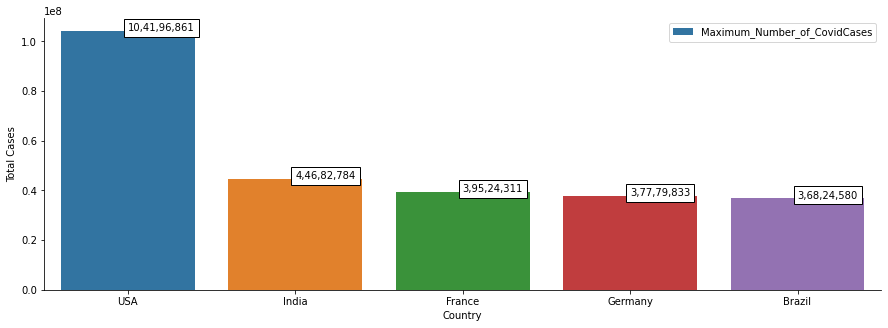

In [15]:
plt.figure(figsize=(15,5))
plt.text(0,104196861,"10,41,96,861",bbox=dict(facecolor="white"))
plt.text(1,44682784,"4,46,82,784",bbox=dict(facecolor="white"))
plt.text(2,39524311,"3,95,24,311",bbox=dict(facecolor="white"))
plt.text(3,37779833,"3,77,79,833",bbox=dict(facecolor="white"))
plt.text(4,36824580,"3,68,24,580",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Total Cases",data=A,label="Maximum_Number_of_CovidCases")
plt.legend()
sns.despine()
plt.plot

# Countries having Minimum number of Covid Cases

In [16]:
B = DS1.sort_values(["Total Cases"],ascending=True).head()
B

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
230,231,Tokelau,5,0,NaN,5,NaN,"1,378"
229,230,MS Zaandam,9,2,7,0,NaN,NaN
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
227,228,Vatican City,29,0,29,0,NaN,799
226,227,Diamond Princess,712,13,699,0,NaN,NaN


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

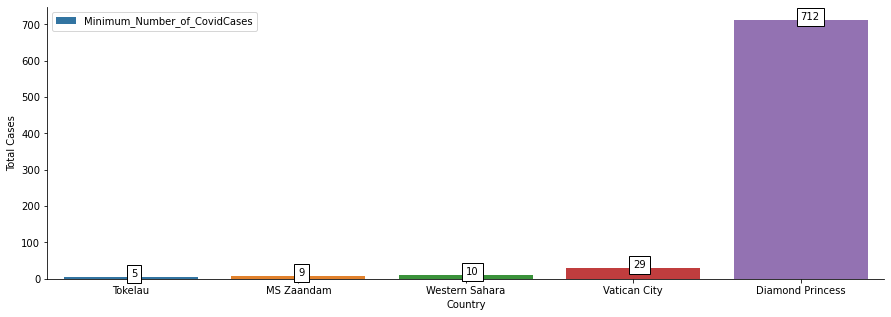

In [17]:
plt.figure(figsize=(15,5))
plt.text(0,5,"5",bbox=dict(facecolor="white"))
plt.text(1,9,"9",bbox=dict(facecolor="white"))
plt.text(2,10,"10",bbox=dict(facecolor="white"))
plt.text(3,29,"29",bbox=dict(facecolor="white"))
plt.text(4,712,"712",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Total Cases",data=B,label="Minimum_Number_of_CovidCases")
plt.legend()
sns.despine()
plt.plot

# Country Having Maximum % of Covid Cases with respect to their own Population / Countries that got affected the most with respect to their population

In [18]:
C = DS1.loc[:,["Country","Total Cases","Population"]]
C

,Country,Total Cases,Population
0,USA,104196861,"334,805,269"
1,India,44682784,"1,406,631,776"
2,France,39524311,"65,584,518"
3,Germany,37779833,"83,883,596"
4,Brazil,36824580,"215,353,593"
...,...,...,...
226,Diamond Princess,712,NaN
227,Vatican City,29,799
228,Western Sahara,10,"626,161"
229,MS Zaandam,9,NaN


In [19]:
# Droping NULL VALUES from Dataset C 
C=C.dropna()

In [20]:
# Changing the dataype of Population to int in order to perform Calculation
C["Population"]=C["Population"].str.replace(",","")
C["Population"]=C["Population"].astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_18972\3787902924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C["Population"]=C["Population"].str.replace(",","")
C:\Users\HP\AppData\Local\Temp\ipykernel_18972\3787902924.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C["Population"]=C["Population"].astype(int)


In [21]:
C["Affected_Population_Percentage"]=C["Total Cases"]/C["Population"] * 100

C:\Users\HP\AppData\Local\Temp\ipykernel_18972\3789956146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  C["Affected_Population_Percentage"]=C["Total Cases"]/C["Population"] * 100


In [22]:
D=C.sort_values(["Affected_Population_Percentage"],ascending=False).head()
D

,Country,Total Cases,Population,Affected_Population_Percentage
164,Faeroe Islands,34658,49233,70.395873
173,San Marino,23427,34085,68.731113
22,Austria,5780229,9066710,63.752221
56,Slovenia,1321852,2078034,63.610701
105,Brunei,275220,445431,61.787348


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

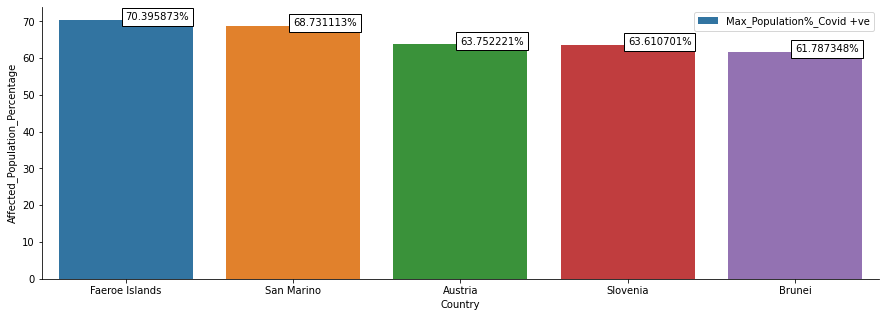

In [23]:
plt.figure(figsize=(15,5))
plt.text(0,70.395873,"70.395873%",bbox=dict(facecolor="white"))
plt.text(1,68.731113,"68.731113%",bbox=dict(facecolor="white"))
plt.text(2,63.752221,"63.752221%",bbox=dict(facecolor="white"))
plt.text(3,63.610701,"63.610701%",bbox=dict(facecolor="white"))
plt.text(4,61.787348,"61.787348%",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Affected_Population_Percentage",data=D,label="Max_Population%_Covid +ve")
plt.legend()
sns.despine()
plt.plot

# Country Having Minimum % of Covid Cases with respect to their own Population / Countries that got affected the least with respect to their population

In [24]:
E=C.sort_values(["Affected_Population_Percentage"],ascending=True).head()
E

,Country,Total Cases,Population,Affected_Population_Percentage
228,Western Sahara,10,626161,0.001597
200,Niger,9931,26083660,0.038074
196,Yemen,11945,31154867,0.038341
207,Chad,7652,17413580,0.043943
156,Tanzania,42664,63298550,0.067401


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

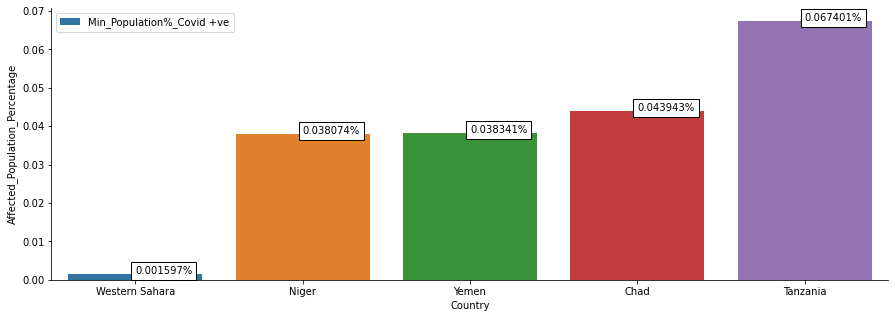

In [25]:
plt.figure(figsize=(15,5))
plt.text(0,0.001597,"0.001597%",bbox=dict(facecolor="white"))
plt.text(1,0.038074,"0.038074%",bbox=dict(facecolor="white"))
plt.text(2,0.038341,"0.038341%",bbox=dict(facecolor="white"))
plt.text(3,0.043943,"0.043943%",bbox=dict(facecolor="white"))
plt.text(4,0.067401,"0.067401%",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Affected_Population_Percentage",data=E,label="Min_Population%_Covid +ve")
plt.legend()
sns.despine()
plt.plot

#  Countries having Maximum number of Death Cases

In [26]:
F = DS1.sort_values(["Total Deaths"],ascending=False).head()
F

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,104196861,1132935,"101,322,779","1,741,147","1,159,832,679","334,805,269"
4,5,Brazil,36824580,697074,"35,919,372","208,134","63,776,166","215,353,593"
1,2,India,44682784,530740,"44,150,289","1,755","915,265,788","1,406,631,776"
9,10,Russia,21958696,395108,"21,356,008","207,580","273,400,000","145,805,947"
18,19,Mexico,7368252,332198,"6,606,633","429,421","19,356,195","131,562,772"


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

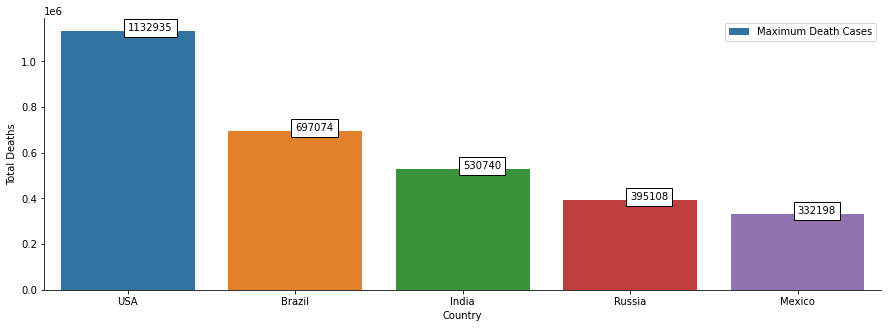

In [27]:
plt.figure(figsize=(15,5))
plt.text(0,1132935,"1132935",bbox=dict(facecolor="white"))
plt.text(1,697074,"697074",bbox=dict(facecolor="white"))
plt.text(2,530740,"530740",bbox=dict(facecolor="white"))
plt.text(3,395108,"395108",bbox=dict(facecolor="white"))
plt.text(4,332198,"332198",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Total Deaths",data=F,label="Maximum Death Cases")
plt.legend()
sns.despine()
plt.plot

# Countries having Minimum number of Death Cases

In [28]:
G = DS1.sort_values(["Total Deaths"],ascending=True).head(15)

In [29]:
H = G.groupby("Total Deaths").count()
I = H.loc[:,["Country"]]
I

,Country
Total Deaths,
0,6
1,2
2,3
6,1
7,1
8,1
9,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

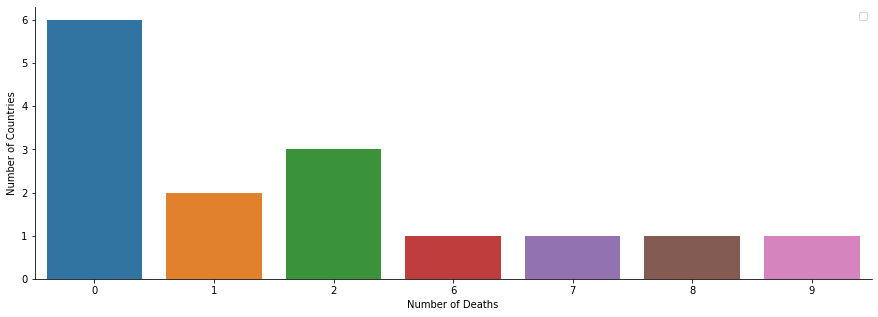

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x="Total Deaths",data=G)
plt.xlabel("Number of Deaths")
plt.ylabel("Number of Countries")
plt.legend()
sns.despine()
plt.plot

Reading of Graph : We can say that their are 6 countries with 0 number of death , 2 countries with total 1 death , 3 countries with total 2 deaths and so on ......... 

# Countries having Maximum number of Death% due to Covid 

In [31]:
J= DS1.loc[:,["Country","Total Cases","Total Deaths","Active Cases"]]
J.dropna(inplace=True)
J.isnull().sum()

Country         0
Total Cases     0
Total Deaths    0
Active Cases    0
dtype: int64

In [32]:
# Changing the Datatype of "Active Cases" in order to perform Calculation
J["Active Cases"]=J["Active Cases"].str.replace(",","")
J["Active Cases"]=J["Active Cases"].astype(int)

In [33]:
J["Inactive Cases"]=J["Total Cases"]-J["Active Cases"]

J.dropna(inplace=True)
J.isnull().sum()

Country           0
Total Cases       0
Total Deaths      0
Active Cases      0
Inactive Cases    0
dtype: int64

In [34]:
J["Death Percentage"]=J["Total Deaths"]/J["Inactive Cases"]*100

In [35]:
K = J.sort_values(["Death Percentage"],ascending=False).head()
K

,Country,Total Cases,Total Deaths,Active Cases,Inactive Cases,Death Percentage
229,MS Zaandam,9,2,0,9,22.222222
196,Yemen,11945,2159,662,11283,19.134982
228,Western Sahara,10,1,0,10,10.000000
170,Somalia,27318,1361,12775,14543,9.358454
144,Sudan,63742,5001,457,63285,7.902347


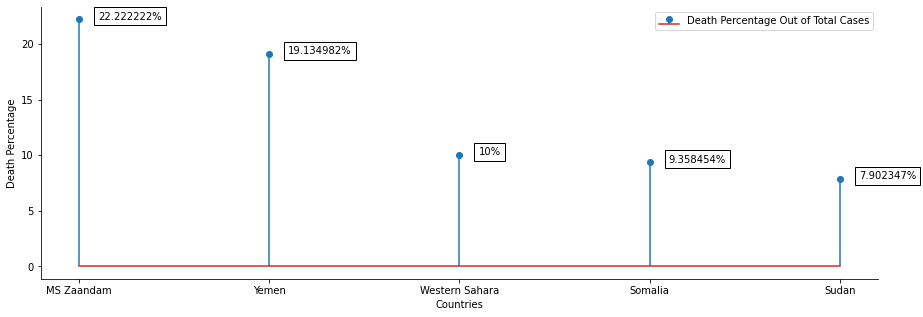

In [36]:
plt.figure(figsize=(15,5))
plt.text(0.1,22.222222,"22.222222%",bbox=dict(facecolor="white"))
plt.text(1.1,19.134982,"19.134982%",bbox=dict(facecolor="white"))
plt.text(2.1,10.000000,"10%",bbox=dict(facecolor="white"))
plt.text(3.1,9.358454,"9.358454%",bbox=dict(facecolor="white"))
plt.text(4.1,7.902347,"7.902347%",bbox=dict(facecolor="white"))
x = K["Country"].unique()
y = K["Death Percentage"].unique()
plt.stem(x,y,label="Death Percentage Out of Total Cases")
plt.xlabel("Countries")
plt.ylabel("Death Percentage")
plt.legend()
sns.despine()
plt.show()

# Countries having Minimum number of Death% due to Covid 

In [37]:
L = J.sort_values(["Death Percentage"],ascending=True)
L.dropna()
L.isnull().sum()
L

,Country,Total Cases,Total Deaths,Active Cases,Inactive Cases,Death Percentage
222,Saint Helena,2166,0,2164,2,0.000000
223,Falkland Islands,1930,0,0,1930,0.000000
225,Niue,747,0,1,746,0.000000
227,Vatican City,29,0,0,29,0.000000
29,DPRK,4772813,74,0,4772813,0.001550
...,...,...,...,...,...,...
228,Western Sahara,10,1,0,10,10.000000
196,Yemen,11945,2159,662,11283,19.134982
229,MS Zaandam,9,2,0,9,22.222222
221,Tuvalu,2805,0,2805,0,NaN


Result : As we can that there are five countries whose Death Percentage is zero , it means that all the people of that country as recovered...

# Countries having Maximum number of Recovery% of Covid Cases

In [38]:
M = DS1.loc[:,["Country","Total Cases","Total Recovered","Active Cases"]]
M.dropna(inplace=True)
M.isnull().sum()

Country            0
Total Cases        0
Total Recovered    0
Active Cases       0
dtype: int64

In [39]:
# Changing the Datatype of "Active Cases" in order to perform Calculation
M["Active Cases"]=M["Active Cases"].str.replace(",","")
M["Active Cases"]=M["Active Cases"].astype(int)

In [40]:
M["Inactive Cases"]=M["Total Cases"]-M["Active Cases"]

M.isnull().sum()

Country            0
Total Cases        0
Total Recovered    0
Active Cases       0
Inactive Cases     0
dtype: int64

In [41]:
# Changing the Datatype of "Total Recovered" in order to perform Calculation
M["Total Recovered"]=M["Total Recovered"].str.replace(",","")
M["Total Recovered"]=M["Total Recovered"].astype(int)

In [42]:
M["Recovery Percentage"]=M["Total Recovered"]/M["Inactive Cases"]*100

In [43]:
N = M.sort_values(["Recovery Percentage"],ascending=False).head()
N

,Country,Total Cases,Total Recovered,Active Cases,Inactive Cases,Recovery Percentage
223,Falkland Islands,1930,1930,0,1930,100.00000
222,Saint Helena,2166,2,2164,2,100.00000
225,Niue,747,746,1,746,100.00000
227,Vatican City,29,29,0,29,100.00000
29,DPRK,4772813,4772739,0,4772813,99.99845


Result : We can see that there are 4 countries whose Recovery Percentage is 100% ,indicating the good health facilities of that country

# Countries having Minimum number of Recovery% of Covid Cases

In [44]:
O = M.sort_values(["Recovery Percentage"],ascending=True).head()
O

,Country,Total Cases,Total Recovered,Active Cases,Inactive Cases,Recovery Percentage
229,MS Zaandam,9,7,0,9,77.777778
196,Yemen,11945,9124,662,11283,80.865018
228,Western Sahara,10,9,0,10,90.000000
170,Somalia,27318,13182,12775,14543,90.641546
144,Sudan,63742,58284,457,63285,92.097653


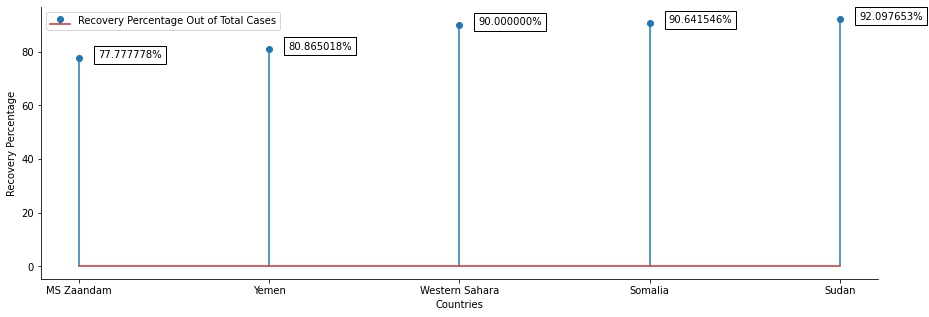

In [45]:
plt.figure(figsize=(15,5))
plt.text(0.1,77.777778,"77.777778%",bbox=dict(facecolor="white"))
plt.text(1.1,80.865018,"80.865018%",bbox=dict(facecolor="white"))
plt.text(2.1,90.000000,"90.000000%",bbox=dict(facecolor="white"))
plt.text(3.1,90.641546,"90.641546%",bbox=dict(facecolor="white"))
plt.text(4.1,92.097653,"92.097653%",bbox=dict(facecolor="white"))
x = O["Country"].unique()
y = O["Recovery Percentage"].unique()
plt.stem(x,y,label="Recovery Percentage Out of Total Cases")
plt.xlabel("Countries")
plt.ylabel("Recovery Percentage")
plt.legend()
sns.despine()
plt.show()

# Countries Having Maximum Number of Recovered Cases

In [46]:
P = M.sort_values(["Total Recovered"],ascending=False).head()
P

,Country,Total Cases,Total Recovered,Active Cases,Inactive Cases,Recovery Percentage
0,USA,104196861,101322779,1741147,102455714,98.894220
1,India,44682784,44150289,1755,44681029,98.812158
2,France,39524311,39264546,95532,39428779,99.583469
3,Germany,37779833,37398100,216022,37563811,99.558855
4,Brazil,36824580,35919372,208134,36616446,98.096282


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

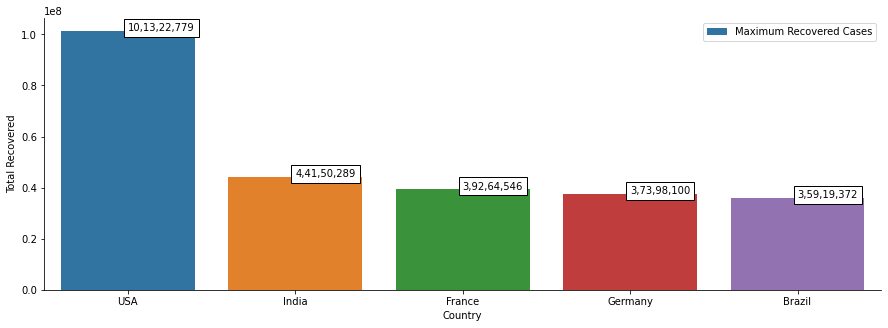

In [47]:
plt.figure(figsize=(15,5))
plt.text(0,101322779,"10,13,22,779",bbox=dict(facecolor="white"))
plt.text(1,44150289,"4,41,50,289",bbox=dict(facecolor="white"))
plt.text(2,39264546,"3,92,64,546",bbox=dict(facecolor="white"))
plt.text(3,37398100,"3,73,98,100",bbox=dict(facecolor="white"))
plt.text(4,35919372,"3,59,19,372",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Total Recovered",data=P,label="Maximum Recovered Cases")
plt.legend()
sns.despine()
plt.plot

# Countries Having Minimum Number of Recovered Cases

In [48]:
Q = M.sort_values(["Total Recovered"],ascending=True).head()
Q

,Country,Total Cases,Total Recovered,Active Cases,Inactive Cases,Recovery Percentage
222,Saint Helena,2166,2,2164,2,100.000000
229,MS Zaandam,9,7,0,9,77.777778
228,Western Sahara,10,9,0,10,90.000000
227,Vatican City,29,29,0,29,100.000000
220,Wallis and Futuna,3427,438,2982,445,98.426966


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

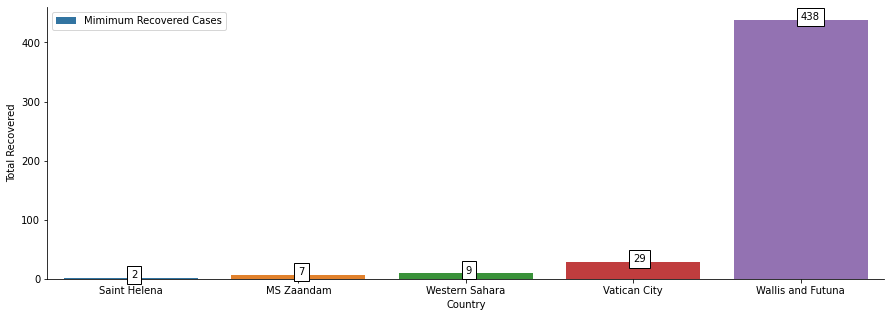

In [49]:
plt.figure(figsize=(15,5))
plt.text(0,2,"2",bbox=dict(facecolor="white"))
plt.text(1,7,"7",bbox=dict(facecolor="white"))
plt.text(2,9,"9",bbox=dict(facecolor="white"))
plt.text(3,29,"29",bbox=dict(facecolor="white"))
plt.text(4,438,"438",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Total Recovered",data=Q,label="Mimimum Recovered Cases")
plt.legend()
sns.despine()
plt.plot

# Countries that Conducted the Maximum Number of Covid Test

In [50]:
R = DS1.loc[:,["Country","Total Cases","Total Test"]]
R.isnull().sum()

Country         0
Total Cases     0
Total Test     18
dtype: int64

In [51]:
# There are 18 countries about which we have no idea that how many covid test had being conducted by them , so we are dropping those countries 
R.dropna(inplace=True)
R.isnull().sum()

Country        0
Total Cases    0
Total Test     0
dtype: int64

In [52]:
# Changing the Datatype of Total Cases to int
R["Total Test"] = R["Total Test"].str.replace(",","")
R["Total Test"] = R["Total Test"].astype(int)

In [53]:
S = R.sort_values(["Total Test"],ascending=False).head()
S

,Country,Total Cases,Total Test
0,USA,104196861,1159832679
1,India,44682784,915265788
8,UK,24274361,522526476
11,Spain,13731478,471036328
9,Russia,21958696,273400000


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

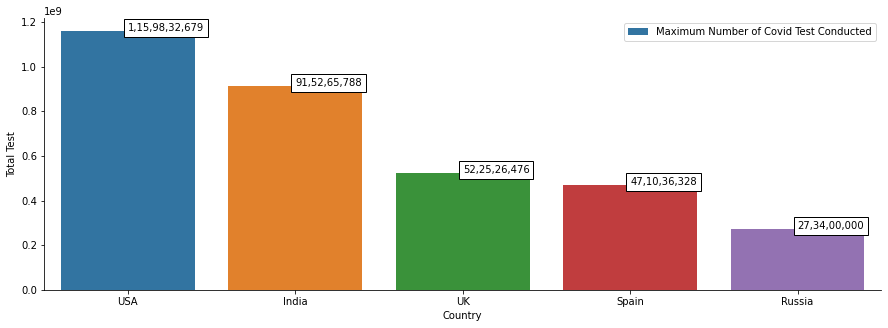

In [54]:
plt.figure(figsize=(15,5))
plt.text(0,1159832679,"1,15,98,32,679",bbox=dict(facecolor="white"))
plt.text(1,915265788,"91,52,65,788",bbox=dict(facecolor="white"))
plt.text(2,522526476,"52,25,26,476",bbox=dict(facecolor="white"))
plt.text(3,471036328,"47,10,36,328",bbox=dict(facecolor="white"))
plt.text(4,273400000,"27,34,00,000",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Total Test",data=S,label="Maximum Number of Covid Test Conducted")
plt.legend()
sns.despine()
plt.plot

# Countries that Conducted the Minimum Number of Covid Test

In [55]:
T = R.sort_values(["Total Test"],ascending=True).head()
T

,Country,Total Cases,Total Test
218,Macao,3488,7850
223,Falkland Islands,1930,8632
224,Montserrat,1403,17762
202,Antigua and Barbuda,9106,18901
209,Cook Islands,7011,19690


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

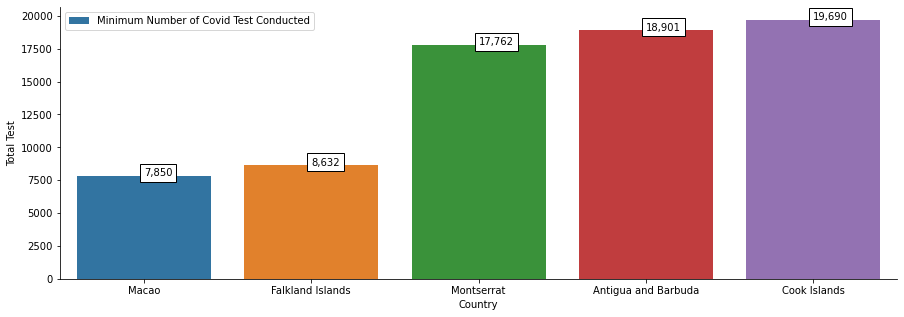

In [56]:
plt.figure(figsize=(15,5))
plt.text(0,7850,"7,850",bbox=dict(facecolor="white"))
plt.text(1,8632,"8,632",bbox=dict(facecolor="white"))
plt.text(2,17762,"17,762",bbox=dict(facecolor="white"))
plt.text(3,18901,"18,901",bbox=dict(facecolor="white"))
plt.text(4,19690,"19,690",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Total Test",data=T,label="Minimum Number of Covid Test Conducted")
plt.legend()
sns.despine()
plt.plot

# Countries having Maximum -ve Result On Covid Test

In [57]:
R["Negative Test"]=R["Total Test"]-R["Total Cases"]
U = R.sort_values(["Negative Test"],ascending = False).head()
U

,Country,Total Cases,Total Test,Negative Test
0,USA,104196861,1159832679,1055635818
1,India,44682784,915265788,870583004
8,UK,24274361,522526476,498252115
11,Spain,13731478,471036328,457304850
9,Russia,21958696,273400000,251441304


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

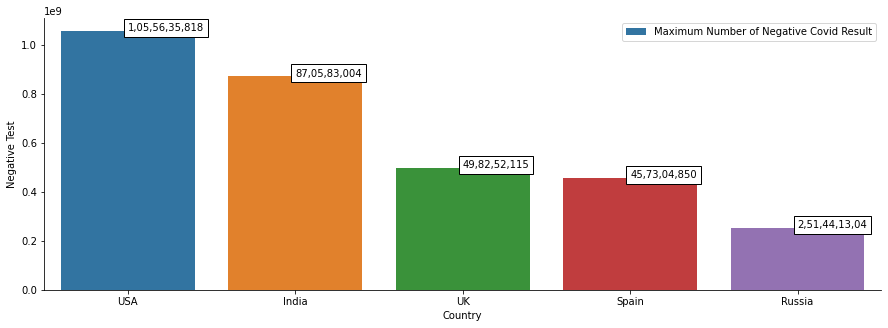

In [58]:
plt.figure(figsize=(15,5))
plt.text(0,1055635818,"1,05,56,35,818",bbox=dict(facecolor="white"))
plt.text(1,870583004,"87,05,83,004",bbox=dict(facecolor="white"))
plt.text(2,498252115,"49,82,52,115",bbox=dict(facecolor="white"))
plt.text(3,457304850,"45,73,04,850",bbox=dict(facecolor="white"))
plt.text(4,251441304,"2,51,44,13,04",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Negative Test",data=U,label="Maximum Number of Negative Covid Result")
plt.legend()
sns.despine()
plt.plot

# Countries having Maximum -ve Result On Covid Test

In [59]:
V = R.sort_values(["Negative Test"],ascending = True).head()
V

,Country,Total Cases,Total Test,Negative Test
6,S. Korea,30197066,15804065,-14393001
106,Algeria,271378,230861,-40517
218,Macao,3488,7850,4362
223,Falkland Islands,1930,8632,6702
202,Antigua and Barbuda,9106,18901,9795


Result: Outcome being in Negative of Negative Test of S.Korea and Algeria make not much valid point , just indicating the data being wrong 
So we can drop the rows of that Countries.

In [60]:
W=V.drop([6,106],axis=0)
W

,Country,Total Cases,Total Test,Negative Test
218,Macao,3488,7850,4362
223,Falkland Islands,1930,8632,6702
202,Antigua and Barbuda,9106,18901,9795


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

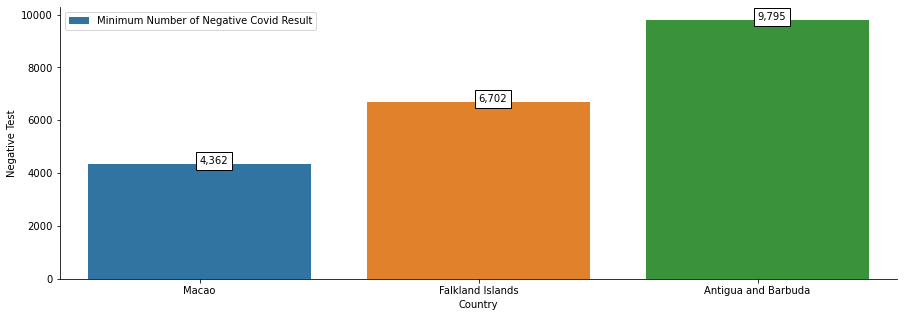

In [61]:
plt.figure(figsize=(15,5))
plt.text(0,4362,"4,362",bbox=dict(facecolor="white"))
plt.text(1,6702,"6,702",bbox=dict(facecolor="white"))
plt.text(2,9795,"9,795",bbox=dict(facecolor="white"))
sns.barplot(x="Country",y="Negative Test",data=W,label="Minimum Number of Negative Covid Result")
plt.legend()
sns.despine()
plt.plot

# Population VS Affected_Population_Percentage 

<StemContainer object of 3 artists>

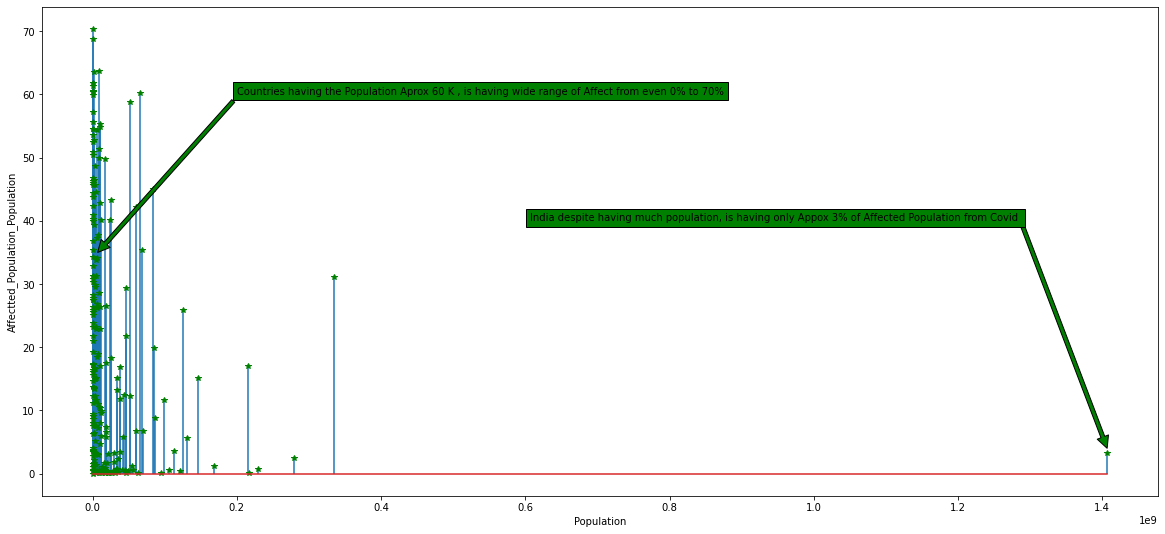

In [141]:
x=C["Population"].unique()
y= C["Affected_Population_Percentage"].unique()
plt.figure(figsize=(20,9))
plt.xlabel("Population")
plt.ylabel("Affectted_Population_Population")
plt.annotate("India despite having much population, is having only Appox 3% of Affected Population from Covid ",(1406631776,4),(606631776,40),arrowprops=dict(facecolor="green"),bbox=dict(facecolor="green"))
plt.annotate("Countries having the Population Aprox 60 K , is having wide range of Affect from even 0% to 70%" ,(7000000,35),(200631776,60),arrowprops=dict(facecolor="green"),bbox=dict(facecolor="green"))
plt.stem(x,y,markerfmt="g*")